In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

Matplotlib is building the font cache; this may take a moment.


In [2]:
# On va importer le dataframe, le nettoyer et le visualiser
df_appels = pd.read_csv("/Users/yves-mariesaliou/Documents/GitHub/MODELES/DATA_TEST_SARIMAX.csv",delimiter=',')
print(df_appels.head(5))

         JOUR                 ACTIVITE  APPELS_RECUS  APPELS_TRAITES
0  2024-01-01    BACK TECH FTTB PROACT             7               7
1  2024-01-01            FRONT RET RED           247             240
2  2024-01-01    BACK TECH FTTH PROACT            15              15
3  2024-01-01      BACK TECH ADSL SWAP            40              40
4  2024-01-01  FRONT TECH FTTB PREMIUM           100              99


In [3]:
# On regarde quels sont ces stats descriptives
df_appels.describe()

,APPELS_RECUS,APPELS_TRAITES
count,6400.000000,6400.000000
mean,3484.921719,3268.119844
std,6806.321221,6407.845034
min,0.000000,0.000000
25%,159.000000,144.000000
50%,609.500000,554.500000
75%,2643.000000,2435.250000
max,50110.000000,43314.000000


In [10]:
# Quel est la forme du dataframe
df_appels_array=np.asanyarray(df_appels)
print("Voici le nombre de lignes et de colonnes : \n{}".format(df_appels_array.shape))

Voici le nombre de lignes et de colonnes : 
(6400, 4)


In [11]:
df_appels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   JOUR            6400 non-null   object
 1   ACTIVITE        6400 non-null   object
 2   APPELS_RECUS    6400 non-null   int64 
 3   APPELS_TRAITES  6400 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 200.1+ KB


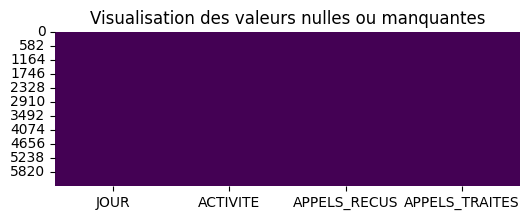

In [16]:
# On va visualiser si il y a des valeurs manquantes/nulls
import seaborn as sns

plt.figure(figsize=(6,2))
sns.heatmap(df_appels.isnull(), cbar=False,cmap='viridis')
plt.title('Visualisation des valeurs nulles ou manquantes')
plt.show()

<Figure size 800x400 with 0 Axes>

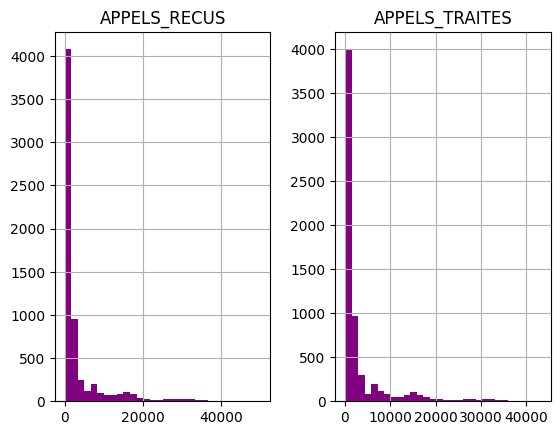

In [20]:
# On va maintenant observer la distribution des valeurs
plt.figure(figsize=(8,4))
df_appels.hist(bins=30,color='purple')
plt.show()

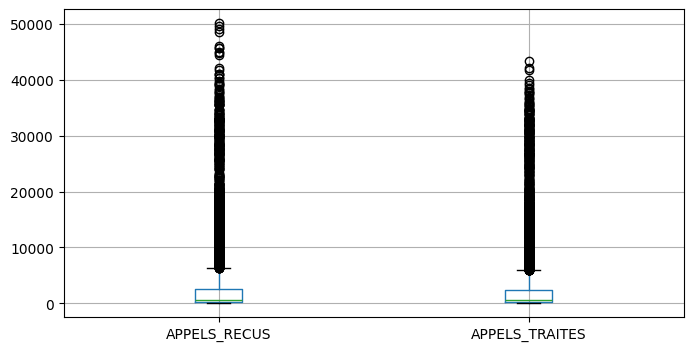

In [21]:
# On va maintenant détecter les valeurs aberrantes
plt.figure(figsize=(8,4))
df_appels.boxplot()
plt.show()

In [23]:
# On veut prédire les volumes d'appel par rapport à la journée ainsi que l'activite
# on va commencer par creer une colonne JOURNEE qui nous donne le jour de la semaine
df_appels['JOUR']=pd.to_datetime(df_appels['JOUR'], format='%Y-%m-%d')
df_appels['JOURNEE']=df_appels['JOUR'].dt.day_name(locale='fr_FR')
print(df_appels.head(100))

         JOUR                 ACTIVITE  APPELS_RECUS  APPELS_TRAITES   JOURNEE
0  2024-01-01    BACK TECH FTTB PROACT             7               7     Lundi
1  2024-01-01            FRONT RET RED           247             240     Lundi
2  2024-01-01    BACK TECH FTTH PROACT            15              15     Lundi
3  2024-01-01      BACK TECH ADSL SWAP            40              40     Lundi
4  2024-01-01  FRONT TECH FTTB PREMIUM           100              99     Lundi
..        ...                      ...           ...             ...       ...
95 2024-01-04             FRONT RET MV           272             269     Jeudi
96 2024-01-04  FRONT TECH FTTB PREMIUM           433             432     Jeudi
97 2024-01-04           BACK TECH ADSL          2471            2052     Jeudi
98 2024-01-05    BACK TECH FTTB PROACT           147             144  Vendredi
99 2024-01-05          FRONT TECH FTTH         19403           15068  Vendredi

[100 rows x 5 columns]


In [29]:
# On va utiliser un SARIMAX car on risque d'avoir d'autres séries temporelles à incorporer plus tard
df_appels_bin=pd.get_dummies(data=df_appels,columns=['ACTIVITE','JOURNEE'], drop_first=True)
df_appels_bin = df_appels_bin.astype(int)
df_appels_bin.head()

,JOUR,APPELS_RECUS,APPELS_TRAITES,ACTIVITE_BACK TECH ADSL,ACTIVITE_BACK TECH ADSL SWAP,ACTIVITE_BACK TECH FTTB PROACT,ACTIVITE_BACK TECH FTTH,ACTIVITE_BACK TECH FTTH PROACT,ACTIVITE_BACK TECH FTTH SWAP,ACTIVITE_BACK TECH MOBILE,...,ACTIVITE_FRONT TECH FTTH,ACTIVITE_FRONT TECH FTTH PREMIUM,ACTIVITE_FRONT TECH MOBILE,ACTIVITE_FRONT TECH MOBILE PREMIUM,JOURNEE_Jeudi,JOURNEE_Lundi,JOURNEE_Mardi,JOURNEE_Mercredi,JOURNEE_Samedi,JOURNEE_Vendredi
0,1704067200000000000,7,7,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1704067200000000000,247,240,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1704067200000000000,15,15,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1704067200000000000,40,40,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1704067200000000000,100,99,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# On va spliter le data frame pour prédire les appels recus

test_size=int(len(df_appels_bin)*0.2)

train=df_appels_bin.iloc[:-test_size]
test=df_appels_bin.iloc[-test_size:]

train['JOUR']=pd.to_datetime(train['JOUR'])
test['JOUR']=pd.to_datetime(test['JOUR'])

y_train=train['APPELS_RECUS']
y_test=test['APPELS_RECUS']

exog_train=train.drop(columns=['APPELS_RECUS','JOUR'])
exog_test=test.drop(columns=['APPELS_RECUS','JOUR'])

/var/folders/9t/mvcxbl9j7mz_3y1qlf_27tyh0000gn/T/ipykernel_90621/1395731065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['JOUR']=pd.to_datetime(train['JOUR'])
/var/folders/9t/mvcxbl9j7mz_3y1qlf_27tyh0000gn/T/ipykernel_90621/1395731065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['JOUR']=pd.to_datetime(test['JOUR'])


In [48]:
# On ajuste le modèle

model_recus = SARIMAX(y_train,order=(1,0,1), seasonal_order=(1,0,1,12), exog=exog_train, enforce_invertibility=False, enforce_stationarity=False)
model_recus_fit=model_recus.fit()
model_recus_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68629D+00    |proj g|=  1.48672D+00


 This problem is unconstrained.



At iterate    5    f=  7.59357D+00    |proj g|=  2.47034D-01

At iterate   10    f=  7.58198D+00    |proj g|=  9.27591D-02

At iterate   15    f=  7.58158D+00    |proj g|=  3.33287D-02

At iterate   20    f=  7.58155D+00    |proj g|=  2.57763D-02

At iterate   25    f=  7.58111D+00    |proj g|=  3.62883D-01

At iterate   30    f=  7.58045D+00    |proj g|=  4.53947D-02

At iterate   35    f=  7.58042D+00    |proj g|=  1.40247D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   36     35     53      1     0     0   1.402D-04   7.580D+00
  F =   7.5804195706217810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       APPELS_RECUS   No. Observations:                 5120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -38811.748
Date:                            Mon, 07 Oct 2024   AIC                          77695.496
Time:                                    23:25:06   BIC                          77930.871
Sample:                                         0   HQIC                         77777.904
                                           - 5120                                         
Covariance Type:                              opg                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
APPELS_TRAITES                         1.0984      0.003    423.369      0.000       1.093       1.103
ACTIVITE_BACK TECH ADSL               83.1273    125.868      0.660      0.509    -163.570     329.825
ACTIVITE_BACK TECH ADSL SWAP          47.7232    188.706      0.253      0.800    -322.134     417.580
ACTIVITE_BACK TECH FTTB PROACT        60.5806    165.816      0.365      0.715    -264.412     385.573
ACTIVITE_BACK TECH FTTH               35.9762    167.197      0.215      0.830    -291.724     363.677
ACTIVITE_BACK TECH FTTH PROACT        38.2619    163.136      0.235      0.815    -281.479     358.003
ACTIVITE_BACK TECH FTTH SWAP          39.2243    160.424      0.245      0.807    -275.201     353.649
ACTIVITE_BACK TECH MOBILE             55.8381    149.083      0.375      0.708    -236.359     348.035
ACTIVITE_FRONT ANC ADSL               60.4222    102.108      0.592      0.554    -139.705     260.549
ACTIVITE_FRONT ANC FTTX              -32.4861     69.453     -0.468      0.640    -168.611     103.639
ACTIVITE_FRONT CO                  -1010.0274     81.731    -12.358      0.000   -1170.218    -849.837
ACTIVITE_FRONT CO PREMIUM            -53.1575    120.185     -0.442      0.658    -288.715     182.400
ACTIVITE_FRONT RET FIXE DEM           72.6495    157.856      0.460      0.645    -236.742     382.041
ACTIVITE_FRONT RET FIXE DEM NC        60.2139    161.179      0.374      0.709    -255.690     376.118
ACTIVITE_FRONT RET HO               -942.6402     70.349    -13.399      0.000   -1080.522    -804.759
ACTIVITE_FRONT RET MV                 52.0937    163.929      0.318      0.751    -269.201     373.388
ACTIVITE_FRONT RET RED                28.0066    114.792      0.244      0.807    -196.981     252.995
ACTIVITE_FRONT TECH ADSL               7.7667     91.218      0.085      0.932    -171.018     186.551
ACTIVITE_FRONT TECH ADSL PREMIUM      21.8901    135.888      0.161      0.872    -244.445     288.226
ACTIVITE_FRONT TECH FTTB              41.5645    103.737      0.401      0.689    -161.756     244.885
ACTIVITE_FRONT TECH FTTB PREMIUM      57.7021    139.872      0.413      0.680    -216.443     331.847
ACTIVITE_FRONT TECH FTTH            -474.8533     62.888     -7.551      0.000    -598.112    -351.595
ACTIVITE_FRONT TECH FTTH PREMIUM      18.6116     88.463      0.210      0.833    -154.772     191.996
ACTIVITE_FRONT TECH MOBILE           -47.9392     71.518     -0.670      0.503    -188.112      92.233
ACTIVITE_FRONT TECH MOBILE PREMIUM    36.7631    149.164      0.246      0.805    -255.593     329.119
JOURNEE_Jeudi                        -40.4215     67.190     -0.602      0.547    -172.112      91.269
JOURNEE_Lundi                       -118.7147     67.492     -1.759      0.079    -250.997      13.568
JOURNEE_Mardi                        -71.31

In [50]:
# On va passer à la partie prédiction
predictions_recus=model_recus_fit.forecast(steps=len(test),exog=exog_test)
print(predictions_recus)

5120     167.656259
5121     624.104099
5122     854.895132
5123     281.380904
5124     910.201698
           ...     
6395     289.616574
6396     281.616958
6397    3130.952353
6398    7054.080253
6399     289.569983
Name: predicted_mean, Length: 1280, dtype: float64


In [41]:
# On va évaluer le modèle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_squared_error(y_test,predictions_recus)
rmse=np.sqrt(mean_squared_error(y_test,predictions_recus))
r2=r2_score(y_test,predictions_recus)

print("MAE : {:.4f}, RMSE : {:.4f} et R2 : {:.2f}".format(mae,rmse,r2))

MAE : 271709.7889, RMSE : 521.2579 et R2 : 0.99


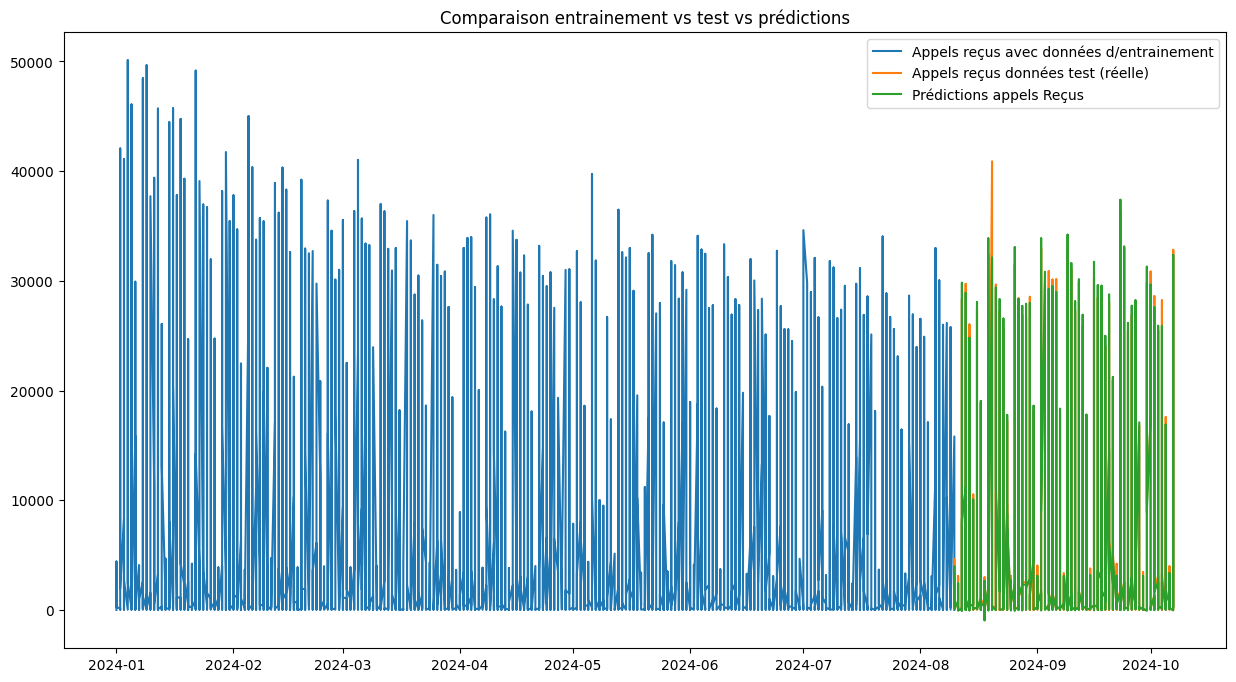

In [51]:
# On va faire un graphique de comparaison entre les predictions et la réalité

plt.figure(figsize=(15,8))
plt.plot(pd.to_datetime(train['JOUR']),y_train,label='Appels reçus avec données d/entrainement')
plt.plot(pd.to_datetime(test['JOUR']),y_test,label='Appels reçus données test (réelle)')
plt.plot(pd.to_datetime(test['JOUR']),predictions_recus,label='Prédictions appels Reçus')
plt.title('Comparaison entrainement vs test vs prédictions')
plt.legend()
plt.show()

In [53]:
# On va repasser les valeurs prédites dans un data frame lisible
predictions_recus = pd.DataFrame({
    'JOUR': test['JOUR'].values,
    'PREDICTIONS_APPELS_RECUS': predictions_recus
})

# On incrémente les activites dans le sens inverse du dummies
for col in test.columns:
    if 'ACTIVITE_' in col:  
        predictions_recus[col] = test[col].values


print(predictions_recus.head())

           JOUR  PREDICTIONS_APPELS_RECUS  ACTIVITE_BACK TECH ADSL  \
5120 2024-08-10                167.656259                        0   
5121 2024-08-10                624.104099                        0   
5122 2024-08-10                854.895132                        1   
5123 2024-08-10                281.380904                        0   
5124 2024-08-10                910.201698                        0   

      ACTIVITE_BACK TECH ADSL SWAP  ACTIVITE_BACK TECH FTTB PROACT  \
5120                             0                               0   
5121                             0                               0   
5122                             0                               0   
5123                             0                               0   
5124                             0                               0   

      ACTIVITE_BACK TECH FTTH  ACTIVITE_BACK TECH FTTH PROACT  \
5120                        0                               1   
5121                        

In [54]:
# reconversion les colonnes binaires en une seule colonne ACTIVITE
def get_activite_from_dummies(row):
    for col in test.columns:
        if 'ACTIVITE_' in col and row[col] == 1:
            return col.replace('ACTIVITE_', '')  # Extraire le nom de l'activité


predictions_recus['ACTIVITE'] = predictions_recus.apply(get_activite_from_dummies, axis=1)


predictions_recus.drop(columns=[col for col in predictions_recus.columns if 'ACTIVITE_' in col], inplace=True)


print(predictions_recus.head())

           JOUR  PREDICTIONS_APPELS_RECUS               ACTIVITE
5120 2024-08-10                167.656259  BACK TECH FTTH PROACT
5121 2024-08-10                624.104099         FRONT ANC ADSL
5122 2024-08-10                854.895132         BACK TECH ADSL
5123 2024-08-10                281.380904    BACK TECH FTTH SWAP
5124 2024-08-10                910.201698        FRONT TECH FTTB


In [59]:
# On va merge avec le df_appels du début pour pouvoir comparer
df_final_recus=pd.merge(df_appels[-test_size:],predictions_recus, on=['ACTIVITE','JOUR'], how='left')
print(df_final_recus.head(), df_final_recus.shape)
df_final_recus['JOUR']=pd.to_datetime(df_final_recus['JOUR'],format='%Y-%m-%D')

        JOUR               ACTIVITE  APPELS_RECUS  APPELS_TRAITES JOURNEE  \
0 2024-08-10  BACK TECH FTTH PROACT           131             130  Samedi   
1 2024-08-10         FRONT ANC ADSL           600             520  Samedi   
2 2024-08-10         BACK TECH ADSL           777             721  Samedi   
3 2024-08-10    BACK TECH FTTH SWAP           265             255  Samedi   
4 2024-08-10        FRONT TECH FTTB           824             810  Samedi   

   PREDICTIONS_APPELS_RECUS  
0                167.656259  
1                624.104099  
2                854.895132  
3                281.380904  
4                910.201698   (1280, 6)


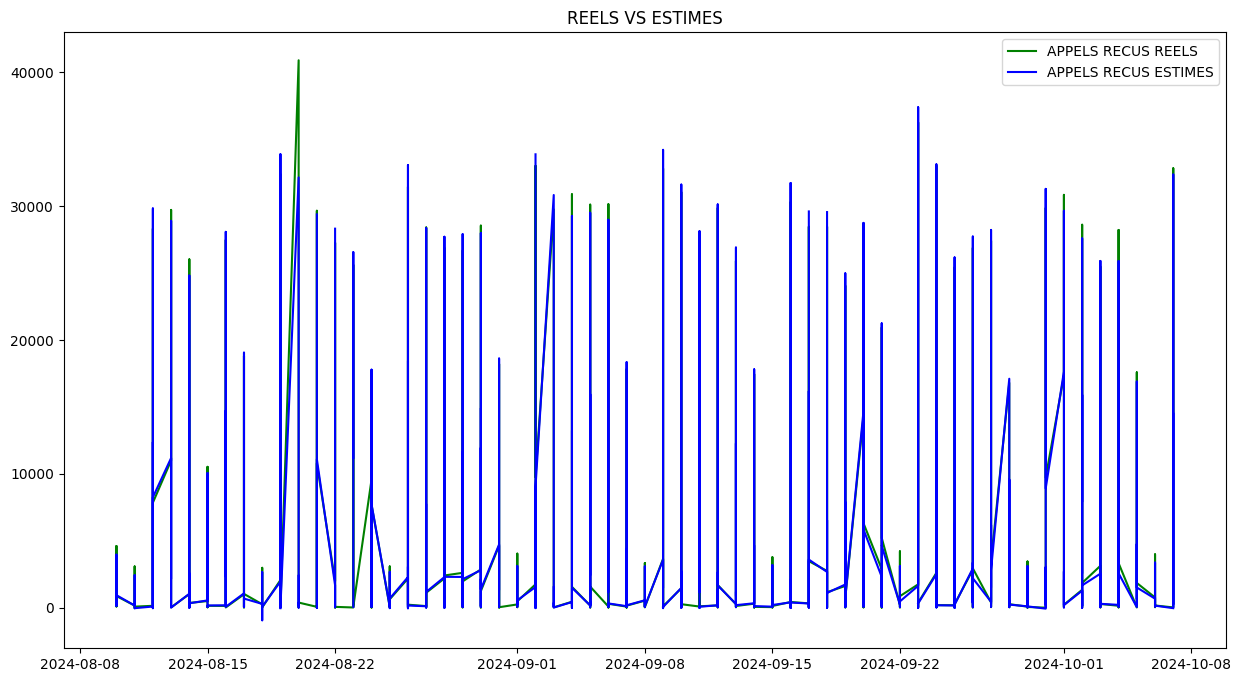

In [61]:
# On va pouvoir plotter avec des fonctions linéaire
plt.figure(figsize=(15,8))
plt.plot(df_final_recus['JOUR'],df_final_recus['APPELS_RECUS'],label='APPELS RECUS REELS',color='green')
plt.plot(df_final_recus['JOUR'],df_final_recus['PREDICTIONS_APPELS_RECUS'],label='APPELS RECUS ESTIMES',color='blue')
plt.title('REELS VS ESTIMES')
plt.legend()
plt.show()

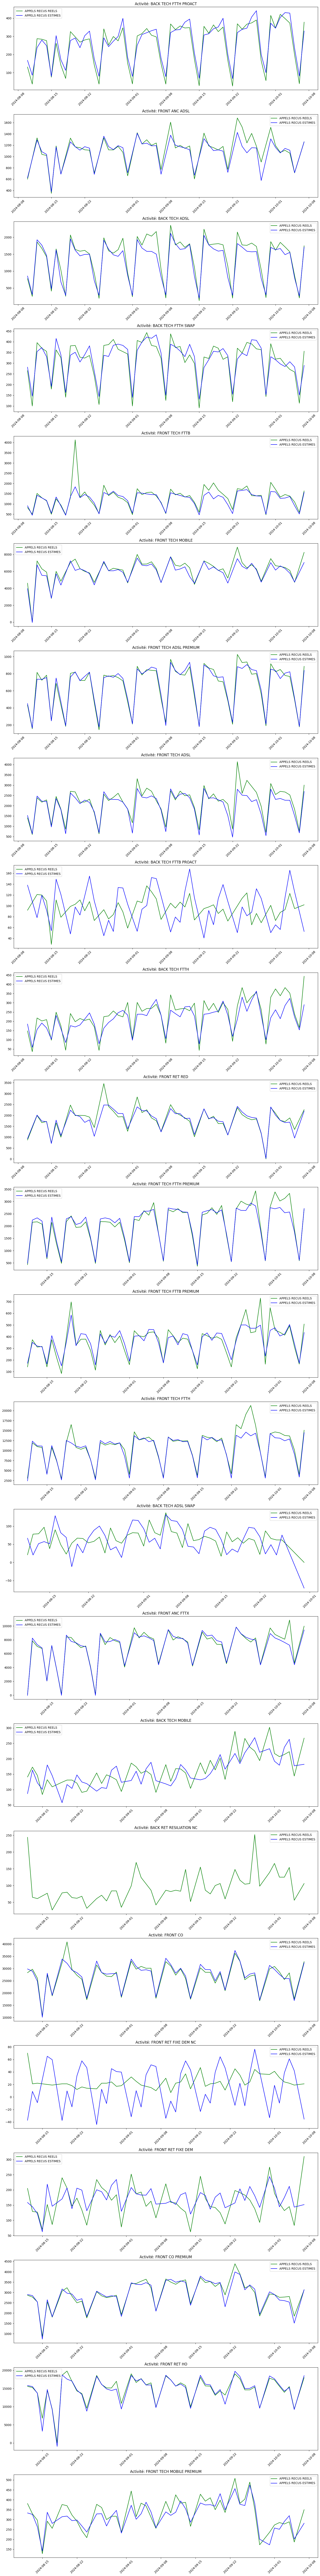

In [62]:
import matplotlib.pyplot as plt

# Liste des activités uniques dans le DataFrame
activites = df_final_recus['ACTIVITE'].unique()

# on créer une figure avec un sous-graphe par activité
fig, axes = plt.subplots(len(activites), 1, figsize=(15, 5 * len(activites)))


if len(activites) == 1:
    axes = [axes]

# on boucle sur chaque activité pour tracer un graphe
for i, activite in enumerate(activites):
    df_activite = df_final_recus[df_final_recus['ACTIVITE'] == activite]

    # Tracé des appels reçus réels
    axes[i].plot(df_activite['JOUR'], df_activite['APPELS_RECUS'], label='APPELS RECUS REELS', color='green')
    
    # Tracé des appels reçus estimés
    axes[i].plot(df_activite['JOUR'], df_activite['PREDICTIONS_APPELS_RECUS'], label='APPELS RECUS ESTIMES', color='blue')
    
    # Titre spécifique pour chaque activité
    axes[i].set_title(f"Activité: {activite}")
    
    # Rotation des étiquettes de l'axe des x pour la lisibilité
    axes[i].tick_params(axis='x', rotation=45)
    
    # Afficher la légende pour chaque graphe
    axes[i].legend()

# Ajuster les espacements entre les sous-graphes
plt.tight_layout()
plt.show()
